In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons,make_circles,make_classification

dataset = 'xor'

def load_dataset(dataset):
    if dataset=='moons':
        X,Y = make_moons(n_samples=500,noise=0.2,random_state=1)
    elif dataset=='circles':
        X,Y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)
    elif dataset=='classification':
        X,Y = make_classification(n_samples=500,n_classes=2,n_features=2,n_informative=2,n_redundant=0,random_state=1)
    else:
        #Create XOR Dataset
        X = np.array([[0,0],
                    [0,1],
                    [1,0],
                    [1,1]])
        Y = np.array([0,1,1,0])
        
    return X,Y


X,Y = load_dataset(dataset)
print(X.shape)
print(Y.shape)

input_size = 2
layers = [4,3]
output_size = 2
EPOCHS=50

def softmax(a):
    ea = np.exp(a)
    return ea/np.sum(ea,axis=1,keepdims=True)



(4, 2)
(4,)


In [38]:
class NeuralNetwork:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        model = {}
        model['W1'] = np.random.randn(input_size,layers[0]) 
        model['b1'] = np.zeros((1,layers[0]))
        
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        
    def forward(self,x):

        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1,W2) + b2 
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        #Store the outputs of each layer for back-propagation
        self.activation_outputs = (a1,a2,y_)
        
        return y_

    def backward(self,x,y,learning_rate=0.001):
            
            W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
            a1,a2,y_ = self.activation_outputs
            
            delta3 = y_ - y
            
            dw3 = np.dot(a2.T,delta3) #)h2+1,C) => (h2+1,m) X (m,C) 
            db3 = np.sum(delta3,axis=0)
            
            delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)  #(m,h2+1) => (m,h2+1) *(m,C X C,h2+1)
            dw2 = np.dot(a1.T,delta2)  
            db2 = np.sum(delta2,axis=0)
            
            delta1 = (1-np.square(a1))*np.dot(delta2,W2.T) 
            dw1 = np.dot(X.T,delta1)
            db1 = np.sum(delta1,axis=0)
            
            self.model['W1'] -= learning_rate*dw1
            self.model['W2'] -= learning_rate*dw2
            self.model['W3'] -= learning_rate*dw3
            
            self.model['b1'] -= learning_rate*db1
            self.model['b2'] -= learning_rate*db2
            self.model['b3'] -= learning_rate*db3
    
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)
        
        print("W2 ",W2.shape)
        print("A2 ",a2.shape)
        
        print("W3 ",W3.shape)
        print("Y_ ",y_.shape)       

In [39]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l    

def one_hot(y,depth):
    m = y.shape[0]
    y_oht = np.zeros((m, depth))
    y_oht[np.arange(m), y] = 1
    return y_oht


model = NeuralNetwork(input_size=2,layers=[4,3],output_size=2)

In [33]:
def train(X,Y,model,epochs,logs=True):
    """Creates and Model and Trains it!"""
    
    training_loss = []
    val_loss = []
    val_acc = []
    
    classes = len(np.unique(Y))
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        training_loss.append(l)
        model.backward(X,Y_OHT)
        if(logs and ix%50==0):
            print("Epoch %d Loss %.4f"%(ix,l),end='\n')
    return training_loss

In [40]:
hist = train(X,Y,model,1000)

Epoch 0 Loss 0.9560
Epoch 50 Loss 0.6608
Epoch 100 Loss 0.5110
Epoch 150 Loss 0.4157
Epoch 200 Loss 0.3500
Epoch 250 Loss 0.3054
Epoch 300 Loss 0.2732
Epoch 350 Loss 0.2479
Epoch 400 Loss 0.2266
Epoch 450 Loss 0.2080
Epoch 500 Loss 0.1914
Epoch 550 Loss 0.1766
Epoch 600 Loss 0.1632
Epoch 650 Loss 0.1512
Epoch 700 Loss 0.1403
Epoch 750 Loss 0.1305
Epoch 800 Loss 0.1215
Epoch 850 Loss 0.1135
Epoch 900 Loss 0.1061
Epoch 950 Loss 0.0994


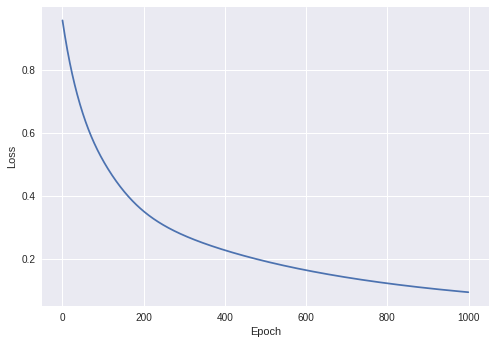

In [41]:
import seaborn

plt.style.use("seaborn")
plt.plot(hist)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [42]:
model.summary()

W1  (2, 4)
A1  (4, 4)
W2  (4, 3)
A2  (4, 3)
W3  (3, 2)
Y_  (4, 2)


In [45]:
outputs = model.predict(X)
training_accuracy = np.sum(outputs==Y)/Y.shape[0]
print("Training Accuracy %.4f"%(training_accuracy*100))

Training Accuracy 100.0000
